In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Loading - "MNIST Data Set" 
## Containing Traning Samples = 60,000 , Testing Samples = 10,000
### TensorFlow already contain MNIST data set which can be loaded using Keras

In [4]:
mnist = tf.keras.datasets.mnist ## handwritten 0 to 9 characters based on 28x28 sized images

# After loading the MNIST data, Divide into train and test datasets

In [5]:
## unpacking the dataset into train and test dadasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

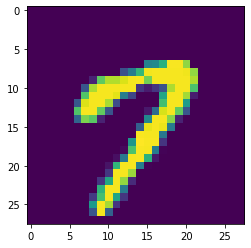

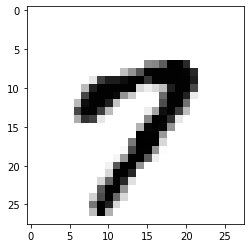

In [7]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[15])
plt.show() #executing the graph
## however we dont know whether its color image or binary images
## so inorder to plot it change the configuration
plt.imshow(x_train[15], cmap = plt.cm.binary)

## Checking the value of each pixel
## Before Normalization

In [8]:
print (x_train[15]) ### before  normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

# As images are in Grey level(1 channel ==> 0 to 255), not Colored(RGB)
## Normalizing the data | Pre-Processing Step

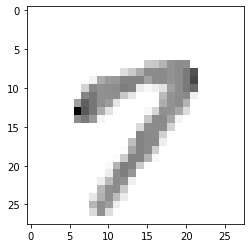

In [9]:
### you might have noticed that its grey image and all values varies from 0 to 255
### in order to normalize it
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[15], cmap = plt.cm.binary)

# After Normalization

In [10]:
print(x_train[15]) ## you can see all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_train[15]) ### just to check that we have labels inside our network

7


# Resizing image to make it suitable for apply Convolution operation

In [12]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing one dimension for kernal [(a.k.a) filter] operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing one dimension for kernal [(a.k.a) filter] operation
print ("Training Samples Dimension", x_trainr.shape)
print ("Training Samples Dimension", x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Training Samples Dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
## Training on 60,000 samples of MIST handwritten dataset

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
### Creating a Neural network now
model = Sequential()

### 1st Convolution layer 0 1 2 3  (60000,28,28,1)   28*3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ### only for first convolution layer to mention input layer size
model.add(Activation("relu")) ##activation function- to make it non-linear, any values <0 is dropped and values >0 is allowed
model.add(MaxPooling2D(pool_size = (2,2))) ## MaxPooling single maximum value of 2x2

### 2nd Convolution layer   (26*3+1 = 24x24)
model.add(Conv2D(64, (3,3))) ### 2nd Convolution layer
model.add(Activation("relu")) ##activation function
model.add(MaxPooling2D(pool_size = (2,2))) ## MaxPooling

### 3rd Convolution layer
model.add(Conv2D(64, (3,3))) ### 3rd Convolution layer
model.add(Activation("relu")) ##activation function
model.add(MaxPooling2D(pool_size = (2,2))) ## MaxPooling

### Fully Connected Layer # 1 (20x20 = 400)
model.add(Flatten()) ### before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64)) # Neural Network
model.add(Activation("relu"))

### Fully Connected Layer # 2
model.add(Dense(32))
model.add(Activation("relu"))

### Final Fully Connected Layer 
## output must be equal to number of classes, 10(0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation("softmax")) ### activation function is changed to softmax (class probabilities)
## binary classification, one neuron is Dense layer, sigmoid

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [16]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [17]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [18]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3) # Training my model

Epoch 1/5
1313/1313 [==============================] - 30s 22ms/step - loss: 0.6865 - accuracy: 0.7759 - val_loss: 0.1335 - val_accuracy: 0.9589
Epoch 2/5
1313/1313 [==============================] - 32s 24ms/step - loss: 0.1172 - accuracy: 0.9647 - val_loss: 0.0907 - val_accuracy: 0.9719
Epoch 3/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0839 - accuracy: 0.9747 - val_loss: 0.0728 - val_accuracy: 0.9777
Epoch 4/5
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0645 - accuracy: 0.9799 - val_loss: 0.0720 - val_accuracy: 0.9794
Epoch 5/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0860 - val_accuracy: 0.9742


In [19]:
### Evaluating on tseting data set MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test loss in 10,000 tset samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0776 - accuracy: 0.9779
Test loss in 10,000 tset samples 0.07757251709699631
Validation Accuracy on 10,000 test samples 0.9779000282287598


In [20]:
import cv2

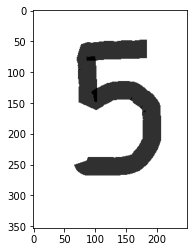

The result is probably : 5


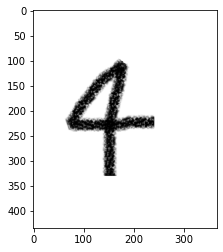

The result is probably : 8


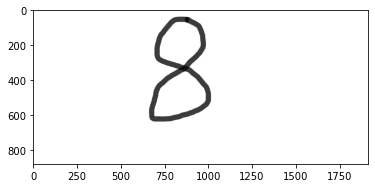

The result is probably : 8


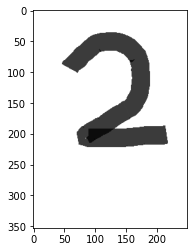

The result is probably : 2


In [21]:
for x in range(1,5):
    img = cv2.imread(f'{x}.png')[:, :, 0]
    img = np.array(img)
    
    plt.imshow(img, cmap = plt.cm.binary)
    plt.show()
    
    resized = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
    newimg = tf.keras.utils.normalize (resized , axis = 1)
    newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict(newimg)
    print(f'The result is probably : {np.argmax(prediction)}')